# Loading  Libraries


In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats


# Loading Dataset

In [2]:
df = pd.read_csv('Car_Price.csv')

In [3]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


# Exploring Datset

In [4]:
df.shape

(205, 26)

In [5]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# Cleaning Data

# Missing Values

In [8]:
df.isnull().any()


car_ID              False
symboling           False
CarName             False
fueltype            False
aspiration          False
doornumber          False
carbody             False
drivewheel          False
enginelocation      False
wheelbase           False
carlength           False
carwidth            False
carheight           False
curbweight          False
enginetype          False
cylindernumber      False
enginesize          False
fuelsystem          False
boreratio           False
stroke              False
compressionratio    False
horsepower          False
peakrpm             False
citympg             False
highwaympg          False
price               False
dtype: bool

In [9]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

# Duplicate Value

In [10]:
df.duplicated().sum()

0

# Datatypes

In [11]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

# Number of unique values of each column

In [12]:
df.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

# Distribution of Target Variable

C:\Users\kubra\AppData\Local\Temp\ipykernel_5104\3663110135.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'], fit=stats.norm)


Text(0, 0.5, 'Frequency')

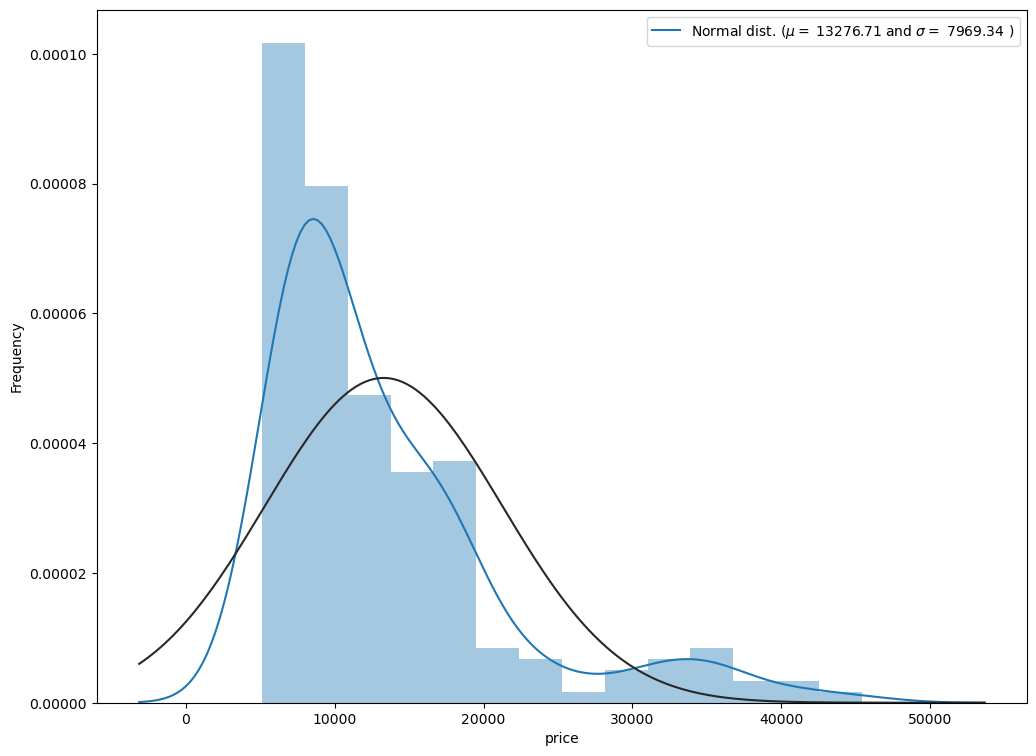

In [13]:
from scipy import stats

plt.subplots(figsize=(12,9))
sns.distplot(df['price'], fit=stats.norm)

(mu, sigma) = stats.norm.fit(df['price'])

# plot with the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

In [14]:
df['price'].describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

C:\Users\kubra\AppData\Local\Temp\ipykernel_5104\3263789468.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'], fit=stats.norm)


Text(0, 0.5, 'Frequency')

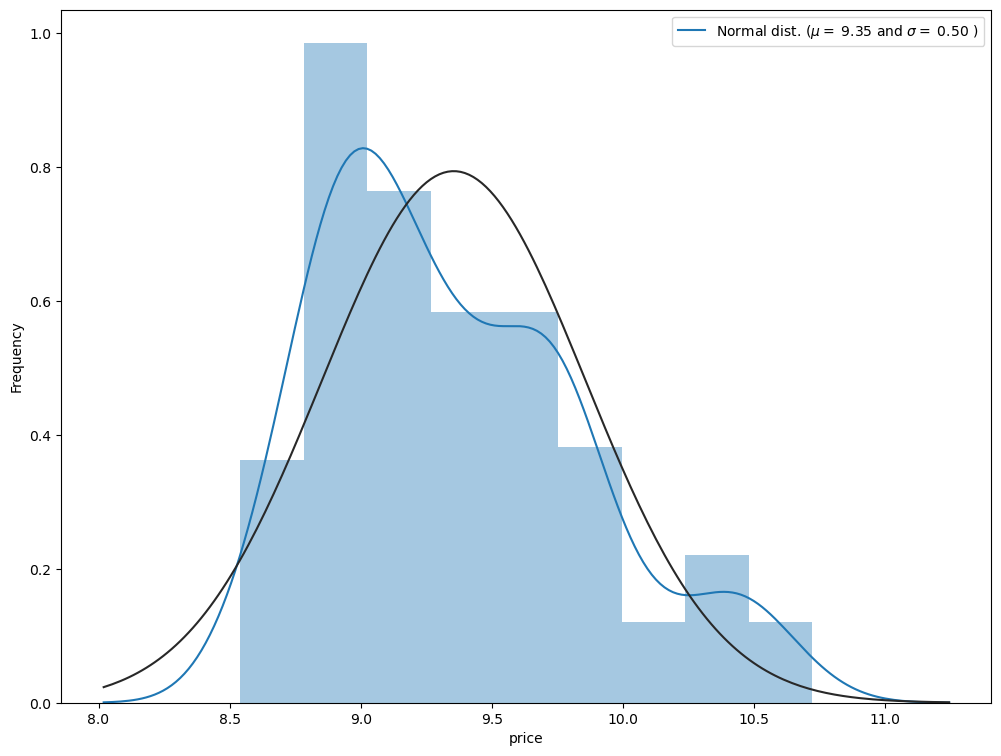

In [15]:
#we use log function which is in numpy
df['price'] = np.log1p(df['price'])

#Check again for more normal distribution
plt.subplots(figsize=(12,9))
sns.distplot(df['price'], fit=stats.norm)

# Get the fitted parameters used by the function
(mu, sigma) = stats.norm.fit(df['price'])

# plot with the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

# Separating categorical & Numerical columns

In [16]:
df_cat=df.select_dtypes("object")
df_num=df.select_dtypes("number")

In [17]:
df_num.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,9.510149
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,9.711176
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,9.711176
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,9.543306
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,9.767152


In [18]:
df_num.shape

(205, 16)

In [19]:
df_cat.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [20]:
df_cat.shape

(205, 10)

In [21]:
categorical_columns = ['fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype',
    'cylindernumber',
    'fuelsystem'
]

for col in categorical_columns:
    
    print(f"Category in {col} is : {df[col].unique()}")

Category in fueltype is : ['gas' 'diesel']
Category in aspiration is : ['std' 'turbo']
Category in doornumber is : ['two' 'four']
Category in carbody is : ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
Category in drivewheel is : ['rwd' 'fwd' '4wd']
Category in enginelocation is : ['front' 'rear']
Category in enginetype is : ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
Category in cylindernumber is : ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
Category in fuelsystem is : ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


# Distribution of Numerical Features

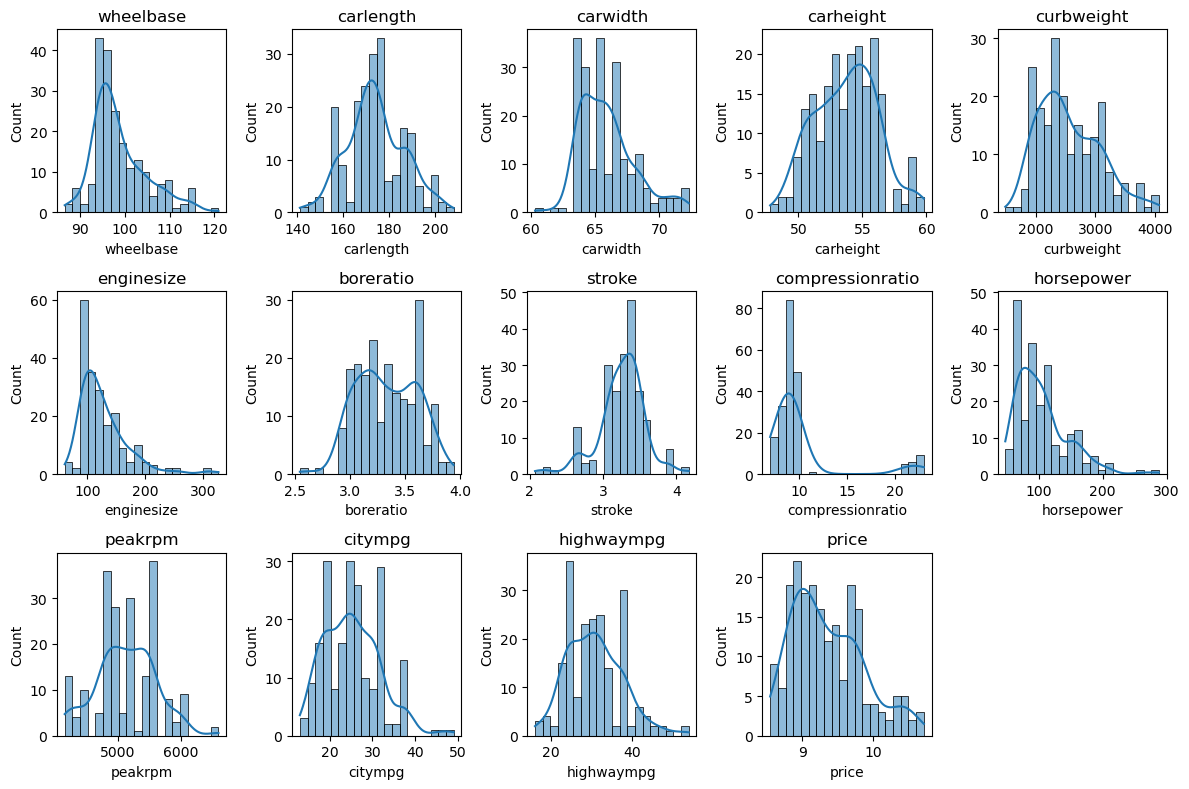

In [22]:
numerical_features = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
                      'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
                      'peakrpm', 'citympg', 'highwaympg', 'price']

plt.figure(figsize=(12, 8))
for feature in numerical_features:
    plt.subplot(3, 5, numerical_features.index(feature) + 1)
    sns.histplot(data=df[feature], bins=20, kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

# Price Analysis

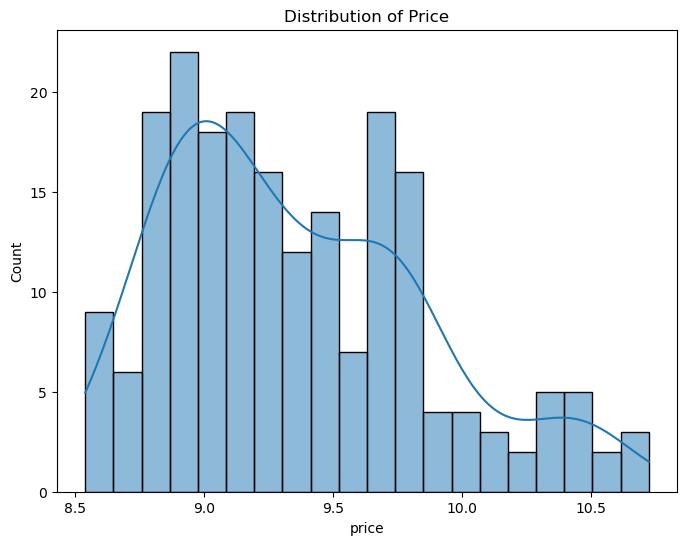

In [23]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df['price'], bins=20, kde=True)
plt.title('Distribution of Price')
plt.show()

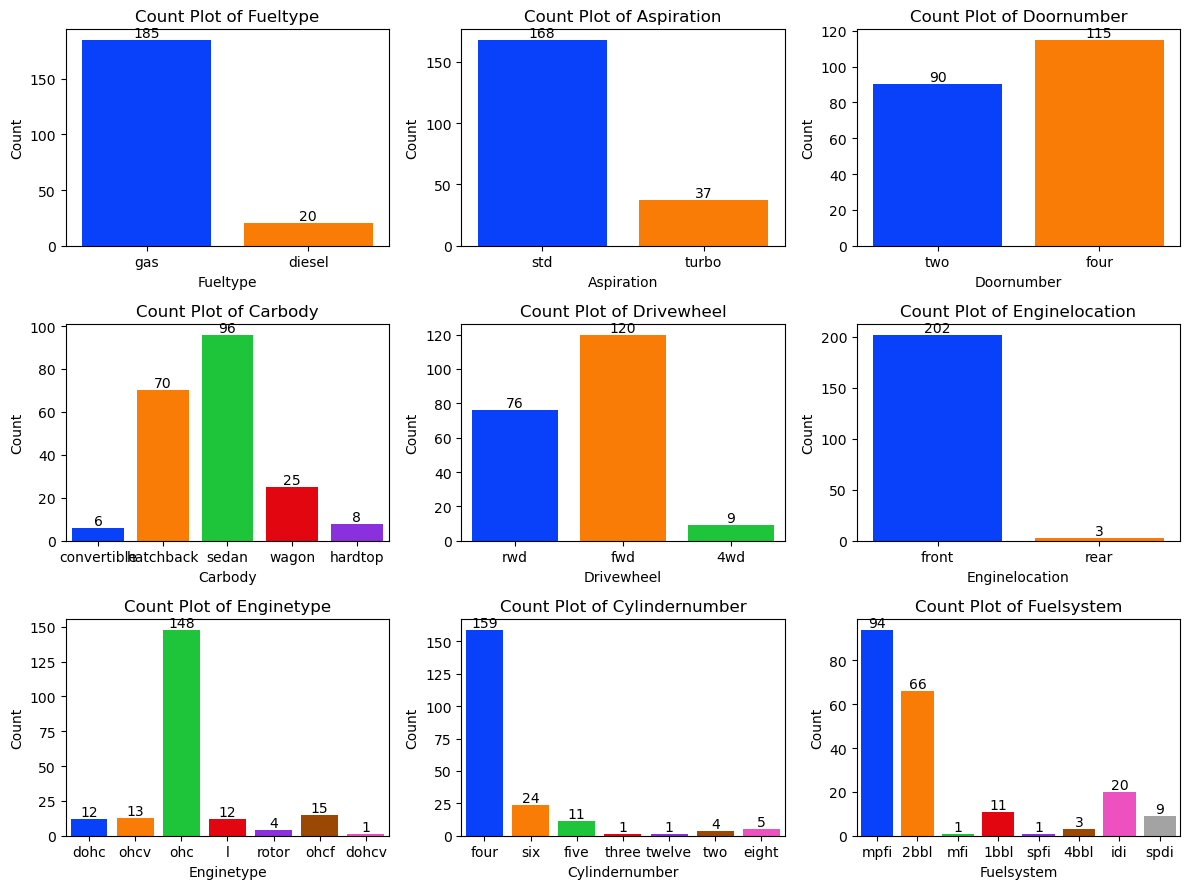

In [24]:
# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 9))
axes = axes.ravel()  # Flatten the 2D array of axes

# Loop through each categorical column
for i, column in enumerate(categorical_columns):
    sns.countplot(x=df[column], data=df, palette='bright', ax=axes[i], saturation=0.95)
    for container in axes[i].containers:
        axes[i].bar_label(container, color='black', size=10)
    axes[i].set_title(f'Count Plot of {column.capitalize()}')
    axes[i].set_xlabel(column.capitalize())
    axes[i].set_ylabel('Count')

# Adjust layout and show plots
plt.tight_layout()
plt.show()

# Countplot of Car Models

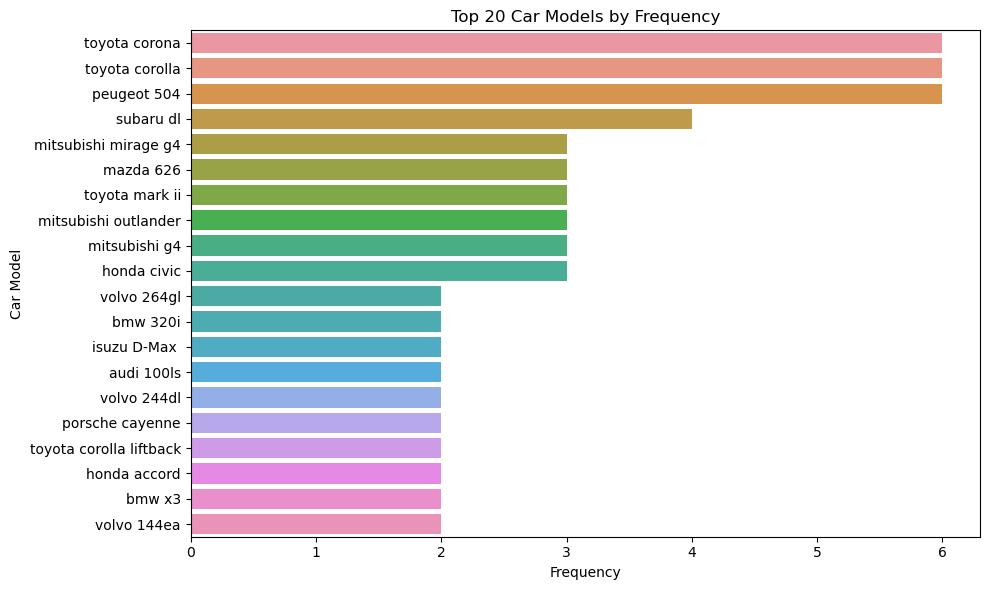

In [25]:
n = 20  # Number of top car models to plot
top_car_models = df['CarName'].value_counts().head(n)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_car_models.values, y=top_car_models.index)
plt.title(f'Top {n} Car Models by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

# Average price for each car model

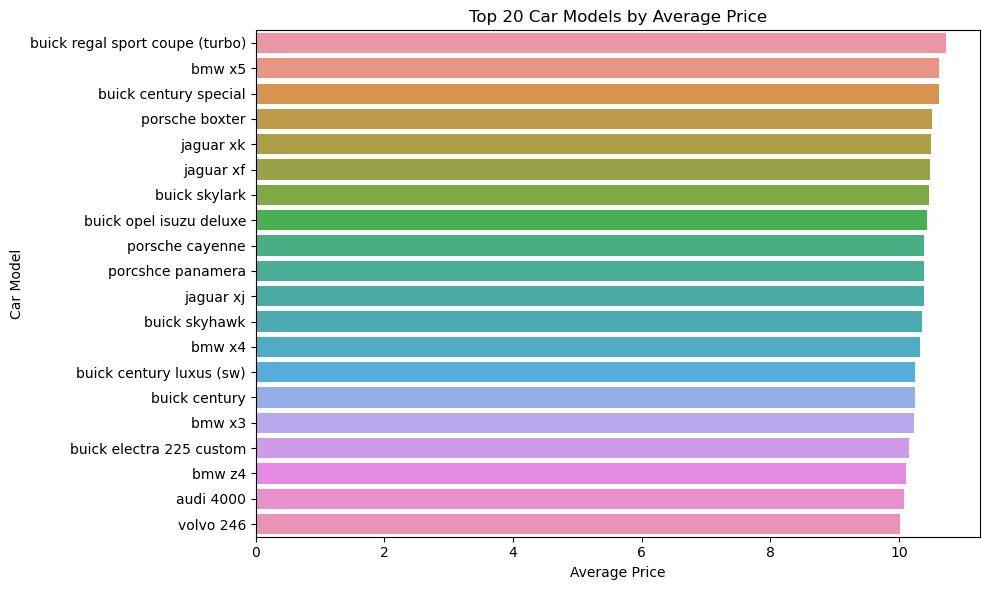

In [26]:

avg_prices_by_car = df.groupby('CarName')['price'].mean().sort_values(ascending=False)

# Plot top N car models by average price
n = 20  # Number of top car models to plot
top_car_models = avg_prices_by_car.head(n)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_car_models.values, y=top_car_models.index)
plt.title(f'Top {n} Car Models by Average Price')
plt.xlabel('Average Price')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

# Categorical Feature vs. Price

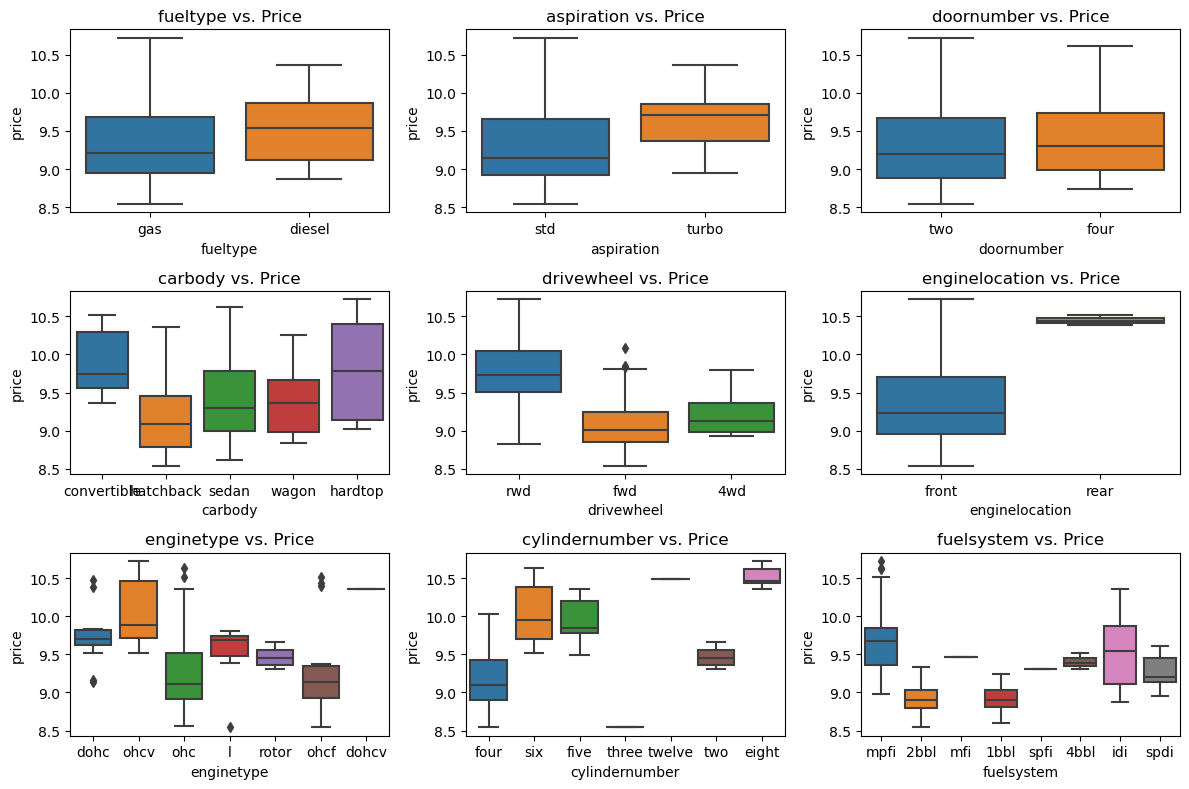

In [27]:

plt.figure(figsize=(12, 8))
for feature in categorical_columns:
    plt.subplot(3, 3, categorical_columns.index(feature) + 1)
    sns.boxplot(data=df, x=feature, y='price')
    plt.title(f'{feature} vs. Price')
plt.tight_layout()
plt.show()

# Correlation

<Axes: >

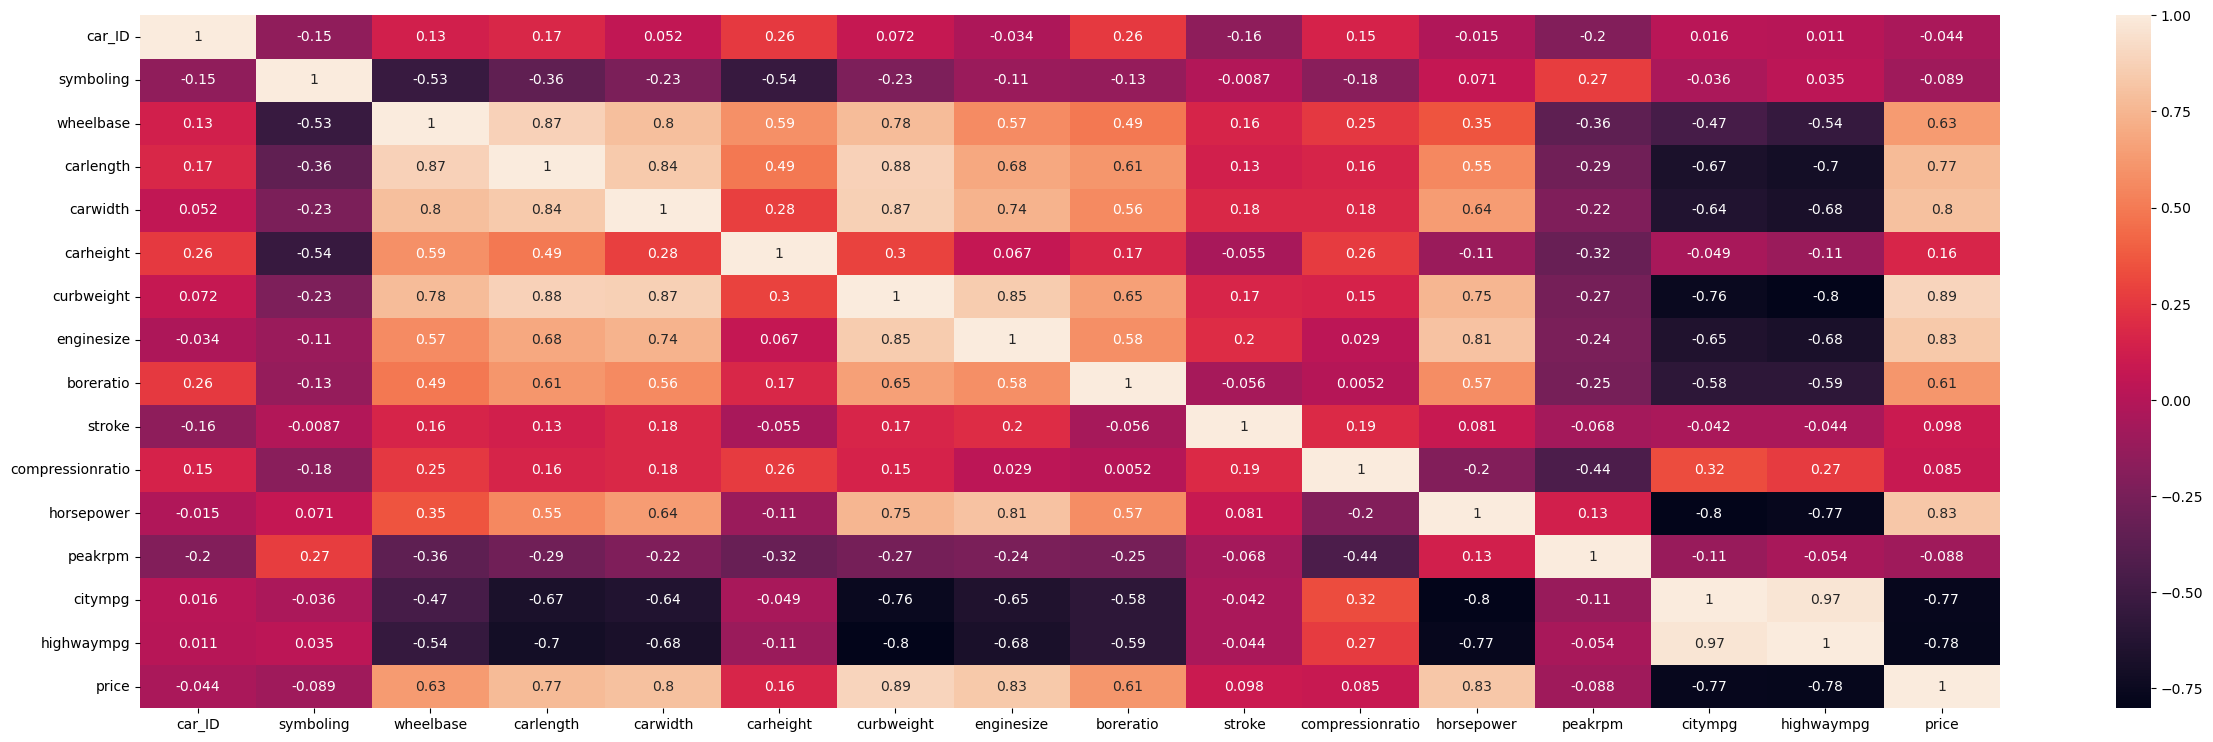

In [28]:
corr = df_num.corr()
plt.subplots(figsize=(30,9))
sns.heatmap(corr, annot=True)

In [29]:
print("Find most important features relative to target")
corr = df_num.corr()
corr.sort_values(['price'], ascending=False, inplace=True)
corr.price

Find most important features relative to target


price               1.000000
curbweight          0.891235
enginesize          0.831990
horsepower          0.825836
carwidth            0.802544
carlength           0.767859
wheelbase           0.629399
boreratio           0.610563
carheight           0.162795
stroke              0.097990
compressionratio    0.085143
car_ID             -0.044496
peakrpm            -0.088454
symboling          -0.088716
citympg            -0.771611
highwaympg         -0.775193
Name: price, dtype: float64

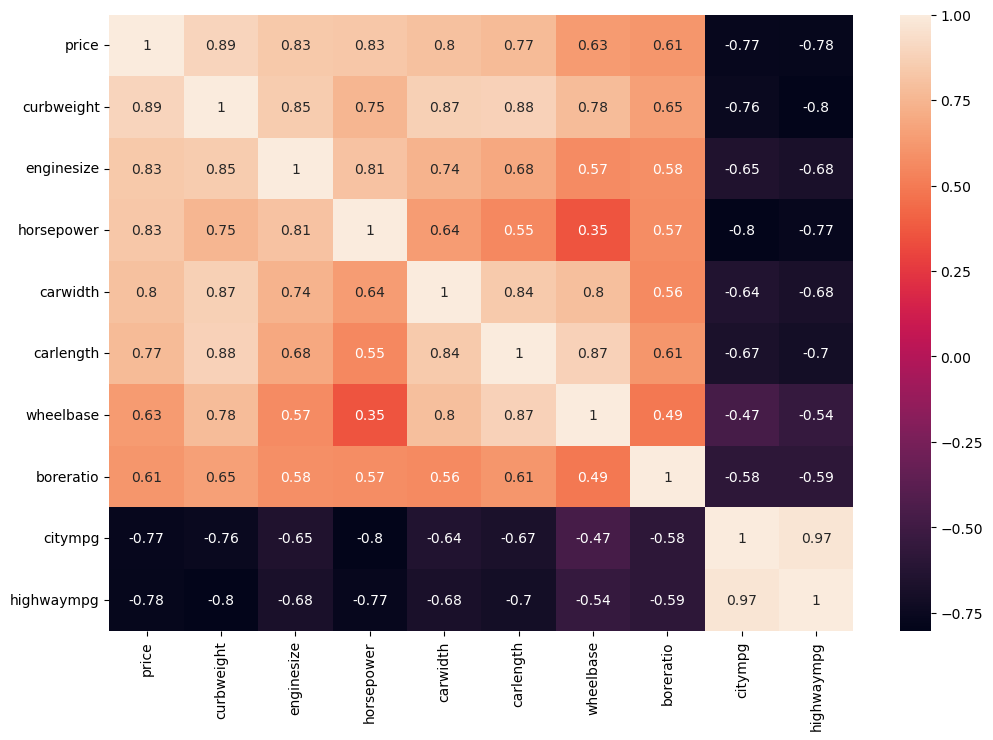

In [30]:
thres = (corr['price'] > 0.5) | (corr['price'] < -0.5)
top_feature = corr.index[abs(thres)]

plt.subplots(figsize=(12, 8))
top_corr = df[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

In [31]:
top_feature

Index(['price', 'curbweight', 'enginesize', 'horsepower', 'carwidth',
       'carlength', 'wheelbase', 'boreratio', 'citympg', 'highwaympg'],
      dtype='object')

# Dropping Columns of low correlation

In [32]:
drop_col = ['carheight', 'stroke', 'compressionratio', 'car_ID', 'peakrpm', 'symboling']
df.drop(drop_col, inplace=True, axis=1)



In [33]:
df.shape

(205, 20)

In [34]:
df_cat.columns

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

In [35]:
df_cat=df.select_dtypes("object")
df_num=df.select_dtypes("number")

In [36]:
df_cat.shape

(205, 10)

In [37]:
df_num.shape

(205, 10)

In [38]:
df['brand'] = df['CarName'].apply(lambda x: x.split(' ')[0])
df['model'] = df['CarName'].apply(lambda x: ' '.join(x.split(' ')[1:]))

# Dealing Categorical Columns

# Label Encoder

In [39]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

for col in df_cat.columns:
    df_cat[col] = labelencoder.fit_transform(df_cat[col])

In [40]:
df_cat.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,2,1,0,1,0,2,0,0,2,5
1,3,1,0,1,0,2,0,0,2,5
2,1,1,0,1,2,2,0,5,3,5
3,4,1,0,0,3,1,0,3,2,5
4,5,1,0,0,3,0,0,3,1,5


In [41]:
# Concatenating encoded categorical data with numerical data
df_encoded = pd.concat([df_cat, df_num], axis=1, join='outer')
df_encoded

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price
0,2,1,0,1,0,2,0,0,2,5,88.6,168.8,64.1,2548,130,3.47,111,21,27,9.510149
1,3,1,0,1,0,2,0,0,2,5,88.6,168.8,64.1,2548,130,3.47,111,21,27,9.711176
2,1,1,0,1,2,2,0,5,3,5,94.5,171.2,65.5,2823,152,2.68,154,19,26,9.711176
3,4,1,0,0,3,1,0,3,2,5,99.8,176.6,66.2,2337,109,3.19,102,24,30,9.543306
4,5,1,0,0,3,0,0,3,1,5,99.4,176.6,66.4,2824,136,3.19,115,18,22,9.767152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,139,1,0,0,3,2,0,3,2,5,109.1,188.8,68.9,2952,141,3.78,114,23,28,9.731869
201,138,1,1,0,3,2,0,3,2,5,109.1,188.8,68.8,3049,141,3.78,160,19,25,9.854612
202,140,1,0,0,3,2,0,5,3,5,109.1,188.8,68.9,3012,173,3.58,134,18,23,9.975157
203,142,0,1,0,3,2,0,3,3,3,109.1,188.8,68.9,3217,145,3.01,106,26,27,10.019981


In [42]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CarName         205 non-null    int32  
 1   fueltype        205 non-null    int32  
 2   aspiration      205 non-null    int32  
 3   doornumber      205 non-null    int32  
 4   carbody         205 non-null    int32  
 5   drivewheel      205 non-null    int32  
 6   enginelocation  205 non-null    int32  
 7   enginetype      205 non-null    int32  
 8   cylindernumber  205 non-null    int32  
 9   fuelsystem      205 non-null    int32  
 10  wheelbase       205 non-null    float64
 11  carlength       205 non-null    float64
 12  carwidth        205 non-null    float64
 13  curbweight      205 non-null    int64  
 14  enginesize      205 non-null    int64  
 15  boreratio       205 non-null    float64
 16  horsepower      205 non-null    int64  
 17  citympg         205 non-null    int

# Preparing the Data for Modeling

In [43]:
y = df_encoded['price']
#Take their values in X and y
X = df_encoded.drop('price', axis = 1).values
y = y.values

In [44]:
X.shape

(205, 19)

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [46]:
X_train.shape

(164, 19)

In [47]:
from sklearn.preprocessing import StandardScaler

sc_x=StandardScaler()

X_train=sc_x.fit_transform(X_train)
X_test=sc_x.fit_transform(X_test)


# Models

# Linear Regression---> Accuracy : 77.05%

In [48]:
from sklearn.linear_model import LinearRegression

model1 = LinearRegression()
#Fit the model
model1.fit(X_train, y_train)



LinearRegression()

# Score/Accuracy

In [49]:
print("Accuracy --> ", model1.score(X_test, y_test)*100)

Accuracy -->  77.05172745363159


# Prediction

In [50]:
y_predict1=model1.predict(X_test)

In [51]:
pred_df1=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_predict1,'Difference':y_test-y_predict1})
pred_df1

,Actual Value,Predicted Value,Difference
0,9.135617,9.502098,-0.366481
1,9.206433,9.218212,-0.011779
2,8.760610,8.755645,0.004965
3,9.736606,9.555460,0.181147
4,9.080118,9.403104,-0.322986
5,9.711176,10.109984,-0.398808
6,9.999661,9.644141,0.355520
7,8.922658,8.773746,0.148913
8,9.817112,9.547582,0.269530
9,9.286931,9.392236,-0.105305


In [52]:
#Prediction
print("Predict value " + str(model1.predict([X_test[14]])))
print("Real value " + str(y_test[14]))

Predict value [8.81882544]
Real value 8.961879012677683


# Evaluate the model---> R-squared: 0.77----->MSR=0.0506

In [53]:
# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_predict1)
r2_square = r2_score(y_test,y_predict1)
print(f" R-squared: {r2_square}")
print(f'Mean Squared Error: {mse}')

 R-squared: 0.7705172745363159
Mean Squared Error: 0.050625290351493366


In [54]:
df_encoded.shape

(205, 20)

# With Feature Engineering

In [55]:
df_encoded['power_to_weight_ratio'] = df_encoded['horsepower'] / df['curbweight']
for column in df_num:
    df_encoded[f'{column}_squared'] = df_encoded[column] ** 2
df_encoded['log_enginesize'] = np.log(df_encoded['enginesize'] + 1)


# Feature Scaling

In [56]:
from sklearn.preprocessing import StandardScaler
numerical_columns = ['wheelbase', 'carlength', 'carwidth', 'curbweight','enginesize', 'boreratio', 'horsepower',]

scaler = StandardScaler()
df_encoded[numerical_columns] = scaler.fit_transform(df_encoded[numerical_columns])

In [57]:
y = df_encoded['price']
#Take their values in X and y
X = df_encoded.drop('price', axis = 1).values
y = y.values

In [58]:
X.shape

(205, 31)

In [59]:
y.shape

(205,)

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

# Linear Regression---> Accuracy : 99.96%(Feature Engineering)

In [61]:
from sklearn.linear_model import LinearRegression

model2 = LinearRegression()
#Fit the model
model2.fit(X_train, y_train)


LinearRegression()

# Score/Accuracy

In [62]:

print("Accuracy --> ", model2.score(X_test, y_test)*100)

Accuracy -->  99.9611352176019


# Prediction

In [63]:
y_predict2=model2.predict(X_test)

In [64]:
pred_df2=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_predict2,'Difference':y_test-y_predict2})
pred_df2

,Actual Value,Predicted Value,Difference
0,9.135617,9.144629,-0.009012
1,9.206433,9.206161,0.000271
2,8.760610,8.756987,0.003623
3,9.736606,9.728854,0.007752
4,9.080118,9.110066,-0.029948
5,9.711176,9.710970,0.000206
6,9.999661,10.013808,-0.014147
7,8.922658,8.915604,0.007054
8,9.817112,9.818928,-0.001815
9,9.286931,9.280736,0.006195


In [65]:
#Prediction
print("Predict value " + str(model2.predict([X_test[14]])))
print("Real value " + str(y_test[14]))

Predict value [8.95263193]
Real value 8.961879012677683


# Evaluate the model---> R-squared: 0.999----->MSR=8.573

In [66]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_predict2)
r2_square = r2_score(y_test,y_predict2)
print(f" R-squared: {r2_square}")
print(f'Mean Squared Error: {mse}')

 R-squared: 0.999611352176019
Mean Squared Error: 8.573808287206466e-05
